# Predicting Sales Revenue 

In this project we are going to use linear regression to predict sales revenue based on advertising spending through media such as TV, Radio and Newspaper.

## Data Source

Collecting data takes significant amount of time and energy. So we must always try to find relevant existing dataset. Luckily, there is a dataset available on Kaggle that suits our purpose.

[A dataset](https://www.kaggle.com/ishaanv/ISLR-Auto#Advertising.csv) containing statistics about the sale of the products in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper.

## Exploring Dataset

Let's start by reading the dataset to a pandas dataframe.

In [2]:
# Importing libraries #
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew


In [3]:
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

In [4]:
advertising_df = pd.read_csv("Advertising.csv")
advertising_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [18]:
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Relationship between features and target variable 

Let's explore how TV, radio and newspaper advertising influences sales revenue using seaborn's pairplot function.

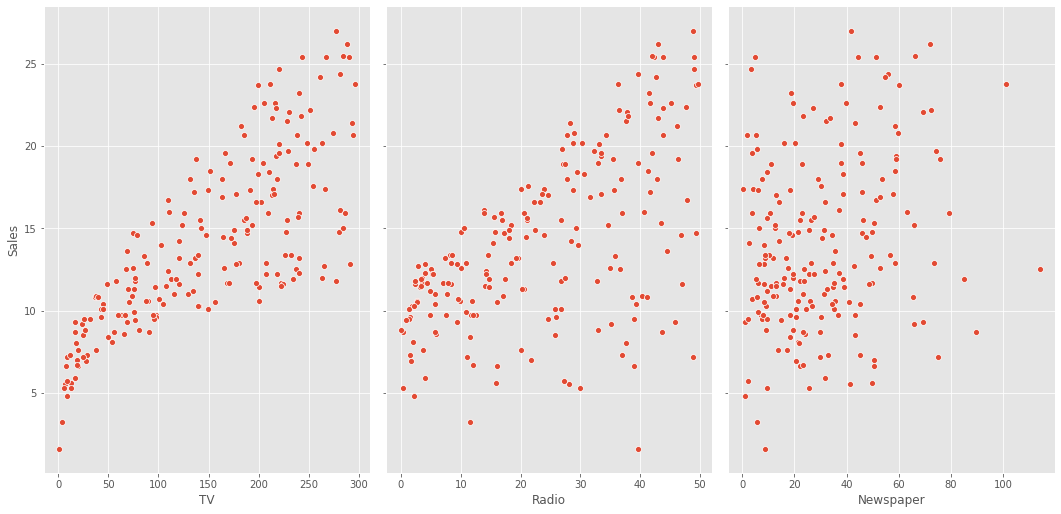

In [10]:
sns.pairplot(advertising_df, x_vars=["TV", "Radio", "Newspaper"], y_vars='Sales', height=7,aspect=0.7)

It looks like TV advertising has a linear relationship with sales compared to the other two advertising media.

## Multivariate Linear Regression

Let's build a linear regression model using all the three features to estimate the coefficients.

In [15]:
# Importing scikit-learn #
from sklearn.linear_model import LinearRegression

# Creating a feature matrix #
features_list = ['TV', 'Radio', 'Newspaper']
X = advertising_df[features_list]
#print(X)

# Target variable is the sales column #
y = advertising_df['Sales']

# create a instance of LinearRegression #
model1 = LinearRegression()
model1.fit(X,y)

# printing out the coefficients #
print(model1.intercept_)
print(model1.coef_)


2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [18]:
# Let's map the feature names to their coefficients #
print(list(zip(features_list, model1.coef_)))

[('TV', 0.045764645455397615), ('Radio', 0.18853001691820456), ('Newspaper', -0.0010374930424763272)]


From the above coefficient values, it looks like there is no correlation between sales and advertising. Let's draw a heat map of the correlation matrix to understand this better.|

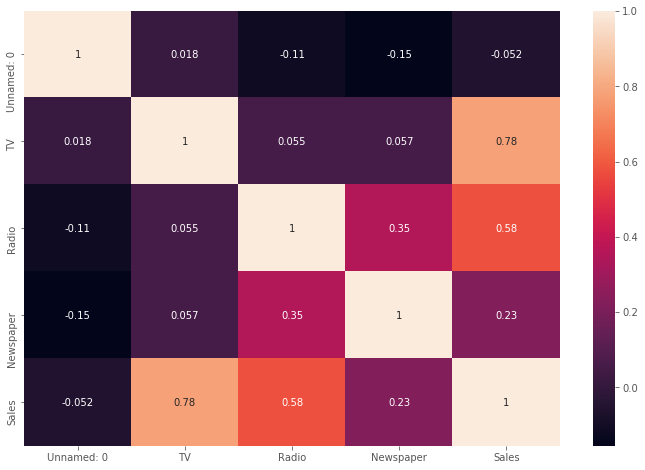

In [19]:
# creating a heat map #

sns.heatmap(advertising_df.corr(), annot=True)

We can notice that the correlation between radio and newspaper is 0.35. This reveals a tendency to spend more on newspaper advertising in markets where more amount in spent in radio advertising. Let's assume that the above linear regression model is correct and the newspaper advertising revenue has no direct impact on the sales but increase in the amount spent on radio advertising increases the sales and with this assumption in mind, we will do feature selection to decide what features to include in our model.

## Feature selection

When we peform multiple linear regression, An important question to consider is whether one of my feature is sufficient to make predictions or do i need a subset of features. It is possible that all the features are required for making accurate predictions. This process of selecting the appropriate features for making predictions is called feature selection. Ideally, we build multiple models with different subset of features and consider the one that best fits our data. We use a metric to determine the quality of the model and in this case we will use r2_score.

In [20]:
# Let's build a regression model using two features TV and Radio #

from sklearn.metrics import r2_score
model_2 = LinearRegression()
model_2.fit(X[['TV', 'Radio']],y)

# model prediction #
model_2_pred = model_2.predict(X[['TV', 'Radio']])


In [ ]:
# Let's compute the R2_Score #

print("R2_Score : ", r2_score(y,model_2_pred))

In [24]:
#  Another Model with all the three features #

model_3 = LinearRegression()
model_3.fit(X[['TV', 'Radio', 'Newspaper']],y)

# model prediciton #
model_3_pred = model_3.predict(X[['TV', 'Radio', 'Newspaper']])

In [27]:
# Computing R2_Score #

print("R2_Score : ", r2_score(y,model_3_pred))

R2_Score :  0.8972106381789522


Based on the R2_Score calculation, we can observe the model that included all the features has a higher r2_score compared to the one with only TV and Radio as features. A high R2_Score explains a large portion of variance in the target variable that is sales.There is a small increase in R2_Score if newspaper is added to the feature matrix. This discrepancy in R2_scores is due to the fact that adding another feature variable to the least squares equation must allow us to fit the data more accurately which means that R2_Score must increase. This provides an additional evidence that we can drop newspaper from feature matrix. Essentially, the newspaper feature does not improve the model performance and including it in the feature matrix will result in poor predictions on test data due to overfitting.

## Model Evaluation using Train/Test Split and Metrics

Let's split the entire dataset into training and testing data. Next we are going to train the model on the training data and use it for making predictions on test data. We are going to evaluate models by calculating RMSE(Root Mean Squared Error). RMSE is a better metric because it amplifies and punishes large errors. Smaller RMSE, better model performance.

In [28]:
# Let's use train/test split with RMSE to see whether newspaper should be kept in the model #
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X= advertising_df[['TV','Radio', 'Newspaper']]
y = advertising_df['Sales']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)

# Training model on training data #
model_4 = LinearRegression()
model_4.fit(X_train,y_train)

# Using model to make predictions on test data #
model_4_pred = model_4.predict(X_test)

In [31]:
# Calculating RMSE and R2_Score Values #

print("RMSE value :  ", np.sqrt(mean_squared_error(y_test,model_4_pred)))
print("R2_Score : ", r2_score(y_test,model_4_pred))

RMSE value :   1.404651423032895
R2_Score :  0.9156213613792232


In [34]:
# Model without  including Newspaper #

X = advertising_df[['TV', 'Radio']]
y = advertising_df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

# Training Model on training data #
model_5 = LinearRegression()
model_5.fit(X_train,y_train)

# Using model to make predictions on test data #
model_5_pred = model_5.predict(X_test)


In [36]:
# Calculating RMSE and R2_Score Values #

print("RMSE value :  ", np.sqrt(mean_squared_error(y_test,model_5_pred)))
print("R2_Score value :  ", r2_score(y_test,model_5_pred))

RMSE value :   1.3879034699382886
R2_Score value :   0.9176214942248908


We can see that RMSE value reduced for the model without newspaper. To get more intution, we can visualize the results using yellowbricks, a machine learning visualization library